In [6]:
import pickle

with open("dataset.pkl", "rb") as f:
    chord_data = pickle.load(f)

print(type(chord_data))
print(chord_data.keys())


<class 'dict'>
dict_keys(['Niko_Kotoulas_ChordProg_1_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_6_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_7_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_9_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_5_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_2_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_3_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_10_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_8_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_ChordProg_4_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas__RhythmChordProg_2_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas__RhythmChordProg_5_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas__RhythmChordProg_4_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas__RhythmChordProg_3_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_Epic_Ending_1_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_Triplets_Arp_3_F#-G#m-B-E (V-vi-I-IV).mid', 'Niko_Kotoulas_Triplets_Arp_1_F#-G#m-B-E (V-

In [1]:
import pickle
import pretty_midi
from mingus.core import chords
import re

with open("dataset.pkl", "rb") as file:
    dataset = pickle.load(file)

def midi_to_note_name_no_octave(midi_number):
    full_note_name = pretty_midi.note_number_to_name(midi_number)
    return re.sub(r'\d', '', full_note_name)

def identify_chord(pitches):
    note_names = [midi_to_note_name_no_octave(p) for p in pitches]
    try:
        chord_names = chords.determine(note_names)
        return chord_names[0] if chord_names else "Unknown"
    except Exception as e:
        print(f"Error identifying chord for notes {note_names}: {e}")
        return "Unknown"

transformed_data = {}
for piece_name, piece_data in dataset.items():
    nmat = piece_data['nmat']
    root = piece_data['root']

    chords_in_piece = []
    for bar in root:
        notes_in_bar = [note for note in nmat if note[0] // 8 == bar[0]]
        notes_in_bar_grouped = {}
        
        for note in notes_in_bar:
            start_time = note[0] % 8
            if start_time not in notes_in_bar_grouped:
                notes_in_bar_grouped[start_time] = []
            notes_in_bar_grouped[start_time].append(note[2])
        
        bar_chords = []
        for start_time, pitches in notes_in_bar_grouped.items():
            chord = identify_chord(pitches)
            bar_chords.append((start_time, chord))
        chords_in_piece.append(bar_chords)
    
    transformed_data[piece_name] = {
        "chords": chords_in_piece,
        "style": piece_data["style"],
        "mode": piece_data["mode"],
        "tonic": piece_data["tonic"],
    }

sample_piece = list(transformed_data.keys())[0]
print(f"Sample transformed data for '{sample_piece}':")
print(transformed_data[sample_piece])


Error identifying chord for notes ['A', 'G', 'B', 'D', 'F#']: can only concatenate str (not "NoneType") to str
Error identifying chord for notes ['G#', 'B', 'D#', 'F#', 'A#', 'C#']: can only concatenate str (not "NoneType") to str
Error identifying chord for notes ['G#', 'B', 'D#', 'F#', 'A#', 'C#']: can only concatenate str (not "NoneType") to str
Sample transformed data for 'Niko_Kotoulas_ChordProg_1_F#-G#m-B-E (V-vi-I-IV).mid':
{'chords': [[], [], [], []], 'style': 'unknown', 'mode': 'M', 'tonic': 11}


In [18]:
transformed_data

{'Niko_Kotoulas_ChordProg_1_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unknown',
  'mode': 'M',
  'tonic': 11},
 'Niko_Kotoulas_ChordProg_6_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unknown',
  'mode': 'M',
  'tonic': 11},
 'Niko_Kotoulas_ChordProg_7_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unknown',
  'mode': 'M',
  'tonic': 11},
 'Niko_Kotoulas_ChordProg_9_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unknown',
  'mode': 'M',
  'tonic': 11},
 'Niko_Kotoulas_ChordProg_5_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unknown',
  'mode': 'M',
  'tonic': 11},
 'Niko_Kotoulas_ChordProg_2_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unknown',
  'mode': 'M',
  'tonic': 11},
 'Niko_Kotoulas_ChordProg_3_F#-G#m-B-E (V-vi-I-IV).mid': {'chords': [[],
   [],
   [],
   []],
  'style': 'unkno

In [5]:
chords.determine(['C', 'E', 'G', 'B'])

['C major seventh', 'Em|CM']

In [33]:
names = dataset.keys()
progs = [e[e.index('(')+1:e.index(')')] for e in names if '(' in e and ')' in e]
progs[:5]

['V-vi-I-IV', 'V-vi-I-IV', 'V-vi-I-IV', 'V-vi-I-IV', 'V-vi-I-IV']

In [34]:
[(e, progs.count(e)) for e in set(progs)]

[('ii-IV-vi-V', 102),
 ('IV-I-V-vi', 110),
 ('vi-III-IV-V', 98),
 ('I-ii-IV', 114),
 ('vi-I-IV-I', 2),
 ('I-V-iii-vi', 124),
 ('IV-V-vi-I-V-IV', 82),
 ('I-IV-V-I', 108),
 ('I-vi-iii-IV', 18),
 ('IV-ii-vi-V', 114),
 ('IV-vi-V-I', 114),
 ('vi-ii-IV-V', 40),
 ('vi-V-ii-IV', 20),
 ('IV-ii-V-I', 106),
 ('I-iii-II-IV', 78),
 ('I-vi-IV-V', 104),
 ('I-vi-III-IV', 82),
 ('vi-IV-I-V', 100),
 ('IV-vi-V-iii', 110),
 ('vi-V-I-IV', 112),
 ('vi-II-IV-V', 114),
 ('vi-iii-IV-I', 116),
 ('vi-V-IV-ii', 138),
 ('IV-vi-V', 124),
 ('IV-V-vi-I', 106),
 ('vi-I-V-vi', 100),
 ('IV-I-vi-V', 116),
 ('iii-IV-V-VI', 90),
 ('I-ii-IV-vi', 20),
 ('vi-V-vi-IV', 114),
 ('vi-ii-III', 94),
 ('vi-ii-iii', 20),
 ('vi-V-IV-iii', 112),
 ('I-V-ii-vi', 18),
 ('iii-IV-I-ii', 114),
 ('vi-V-IV-II', 86),
 ('vi-I-vi-V', 118),
 ('I-iii-ii-IV', 20),
 ('I-v-ii-I', 94),
 ('vi-iii-IV', 106),
 ('I-ii-IV-VI', 88),
 ('vi-V-iii-IV', 92),
 ('I-bIII-bVII-IV', 124),
 ('IV-I-vi-iii', 130),
 ('ii-V-vi-IV', 110),
 ('alt', 2),
 ('ii-vi-I-V', 214),


In [35]:
progs = list(filter(lambda x: x != 'ii-IV-_ (ii-IV-_-V' and x != 'alt', progs))

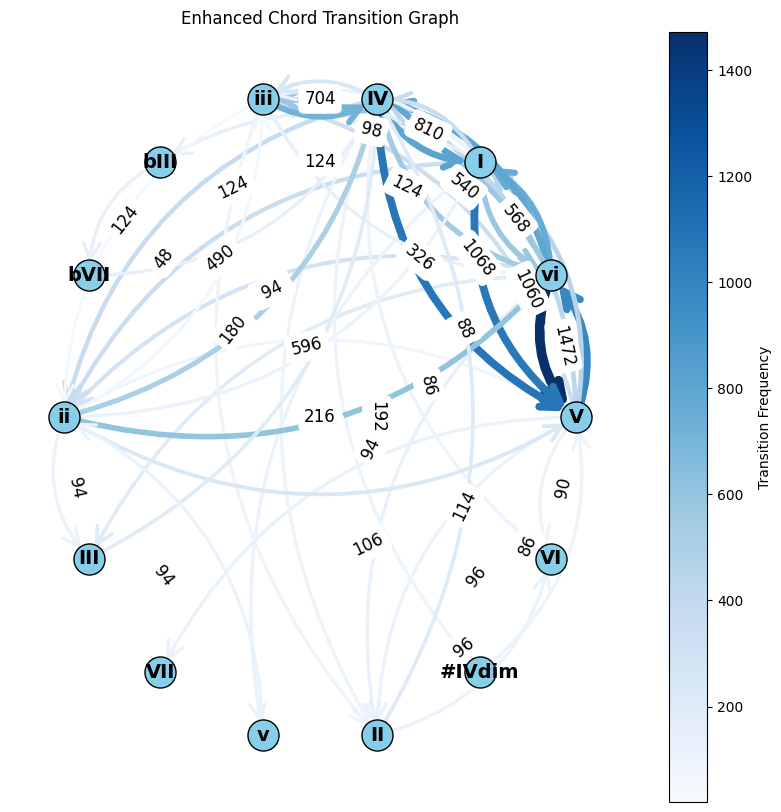

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

G = nx.DiGraph()

for progression in progs:
    chords = progression.split('-')
    for i in range(len(chords) - 1):
        chord_from = chords[i]
        chord_to = chords[i + 1]
        
        if G.has_edge(chord_from, chord_to):
            G[chord_from][chord_to]['weight'] += 1
        else:
            G.add_edge(chord_from, chord_to, weight=1)

weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(weights)

cmap = plt.cm.Blues
colors = [cmap(w / max_weight) for w in weights]

plt.figure(figsize=(10, 10))

pos = nx.circular_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue", edgecolors="black")

nx.draw_networkx_edges(
    G, pos, edge_color=colors, width=[2 + w / max_weight * 5 for w in weights],
    arrowstyle="->", arrowsize=30, connectionstyle="arc3,rad=0.3"
)

nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif", font_weight="bold")

edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

sm = ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label="Transition Frequency")

plt.title("Enhanced Chord Transition Graph")
plt.axis("off")
plt.show()


In [42]:
print(f"Количество узлов (уникальных аккордов): {G.number_of_nodes()}")
print(f"Количество рёбер (переходов): {G.number_of_edges()}\n")

print("Степени узлов (входящие и исходящие):")
for node in G.nodes():
    print(f"{node}: входящая = {G.in_degree(node)}, исходящая = {G.out_degree(node)}")
print("\n")

sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
print("Топ-5 самых частых переходов (аккорд -> аккорд):")
for u, v, data in sorted_edges[:5]:
    print(f"{u} -> {v}, вес = {data['weight']}")

avg_in_degree = sum(dict(G.in_degree()).values()) / G.number_of_nodes()
avg_out_degree = sum(dict(G.out_degree()).values()) / G.number_of_nodes()
print(f"Средняя входящая степень: {avg_in_degree:.2f}")
print(f"Средняя исходящая степень: {avg_out_degree:.2f}\n")

Количество узлов (уникальных аккордов): 14
Количество рёбер (переходов): 47

Степени узлов (входящие и исходящие):
V: входящая = 5, исходящая = 8
vi: входящая = 5, исходящая = 7
I: входящая = 4, исходящая = 7
IV: входящая = 8, исходящая = 8
iii: входящая = 5, исходящая = 4
bIII: входящая = 1, исходящая = 1
bVII: входящая = 1, исходящая = 1
ii: входящая = 6, исходящая = 6
III: входящая = 2, исходящая = 1
VII: входящая = 1, исходящая = 0
v: входящая = 1, исходящая = 1
II: входящая = 4, исходящая = 2
#IVdim: входящая = 1, исходящая = 1
VI: входящая = 3, исходящая = 0


Топ-5 самых частых переходов (аккорд -> аккорд):
vi -> V, вес = 1472
IV -> V, вес = 1068
I -> V, вес = 1060
V -> vi, вес = 972
IV -> I, вес = 810
Средняя входящая степень: 3.36
Средняя исходящая степень: 3.36

